## WEEK4. Coding homework (18-05-29, 정누리)
### part1_잘 나뉜 데이터셋
#### Reference
- generating data : http://solarisailab.com/archives/2271
- merging df : https://pandas.pydata.org/pandas-docs/stable/merging.html
- logistic regression using statsmodels, LDA, QDA : https://nbviewer.jupyter.org/github/emredjan/ISL-python/blob/master/labs/lab_04.6_logistic_regression_lda_qda_knn.ipynb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
sns.set()

### 1. 시뮬레이션 데이터 구성하기 (잘 나뉘어지는 데이터셋)
2개의 well seperable한 Gaussian distribution 시뮬레이션 데이터 구성하기 (numpy.random.normal 활용) - 2차원, 3차원, 4차원

#### 두 개의 클래스로 나뉘어지는 데이터셋 생성하는 함수 만들기

In [6]:
def generating_dataset(mu_a, sigma_a, mu_b, sigma_b, n):
    s_a = np.random.normal(mu_a, sigma_a, n)
    s_b = np.random.normal(mu_b, sigma_b, n)
    y_a = np.random.normal(1,0,n)
    y_b = np.random.normal(0,0,n)
    df1 = pd.DataFrame(np.array([s_a, y_a])).T
    df2 = pd.DataFrame(np.array([s_b, y_b])).T
    df = df1.append(df2)
    df.columns = ['X','y']
    return df

In [85]:
df_x1 = generating_dataset(0,0.5, 1.5,0.5, 2000)

In [86]:
df_x2 = generating_dataset(180, 13, 100, 13, 2000)

In [87]:
df_x3 = generating_dataset(20, 30, 150, 30, 2000)

In [88]:
df_final = pd.concat([df_x1, df_x2,df_x3], axis=1)
df_final.columns = ['X1', 'y1','X2','y2', 'X3','y3'] 
df_final
del df_final['y1']
del df_final['y2']
print(df_final.head())
len(df_final)

         X1          X2         X3   y3
0 -0.012729  191.822864  15.844088  1.0
1 -0.562967  214.645906   9.767416  1.0
2 -0.017746  178.307363   2.814226  1.0
3  0.164986  195.773796  13.274704  1.0
4  0.100033  206.662876  24.377892  1.0


4000

#### 2차원 그래프 그리기

AxesSubplot(0.125,0.125;0.775x0.755)


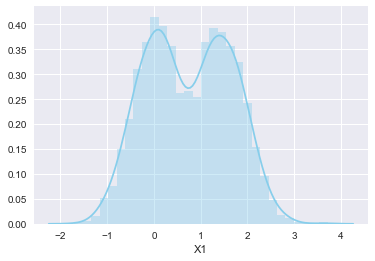

In [89]:
print(sns.distplot(df_final["X1"] , color="skyblue"))

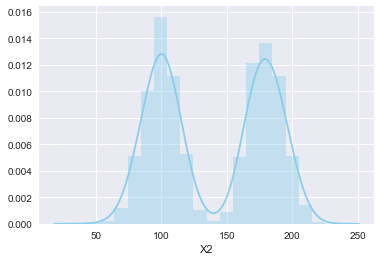

In [90]:
sns.distplot(df_final["X2"] , color="skyblue")

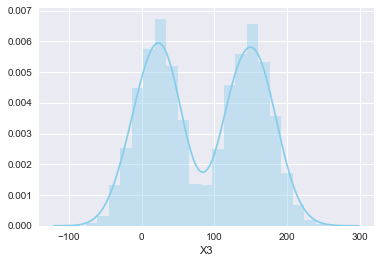

In [91]:
sns.distplot(df_final["X3"] , color="skyblue")

In [92]:
from mpl_toolkits import mplot3d

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [94]:
from matplotlib.mlab import bivariate_normal

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [96]:
X1 = df_final["X1"]
X2 = df_final["X2"]
X3 = df_final["X3"]

#### 3차원 그래프 그리기
- ....? 산이 2 개씩 나와야 하는데 이렇게 나오네요. 흠... X1, X2, X3의 관측치 전체를 가지고 다시 평균, 표준편차를 내고 이를 기반으로 그려서 그런가요...????

In [97]:
def draw_3d_density(a,b):
    a, b = np.meshgrid(a,b)
    Z=bivariate_normal(a, b, a.std(), b.std(), a.mean(), b.mean()) 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(a, b, Z,cmap='viridis',linewidth=5)
    ax.set_xlabel('a axis')
    ax.set_ylabel('b axis')
    ax.set_zlabel('Z axis')
    return(plt.show())

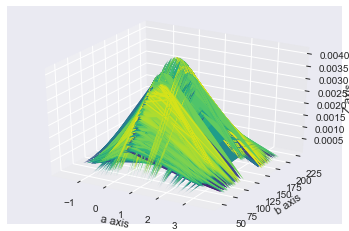

In [98]:
draw_3d_density(X1,X2)

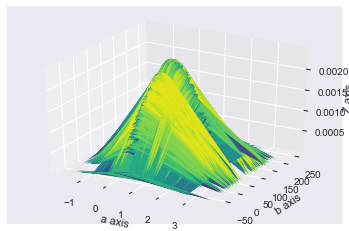

In [99]:
draw_3d_density(X1,X3)

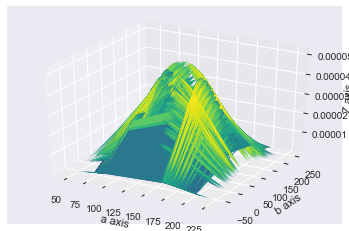

In [100]:
draw_3d_density(X2,X3)

In [30]:
from pandas.plotting import scatter_matrix

In [101]:
df_final.head()

,X1,X2,X3,y3
0,-0.012729,191.822864,15.844088,1.0
1,-0.562967,214.645906,9.767416,1.0
2,-0.017746,178.307363,2.814226,1.0
3,0.164986,195.773796,13.274704,1.0
4,0.100033,206.662876,24.377892,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180D7E6DBE0>,
      dtype=object)

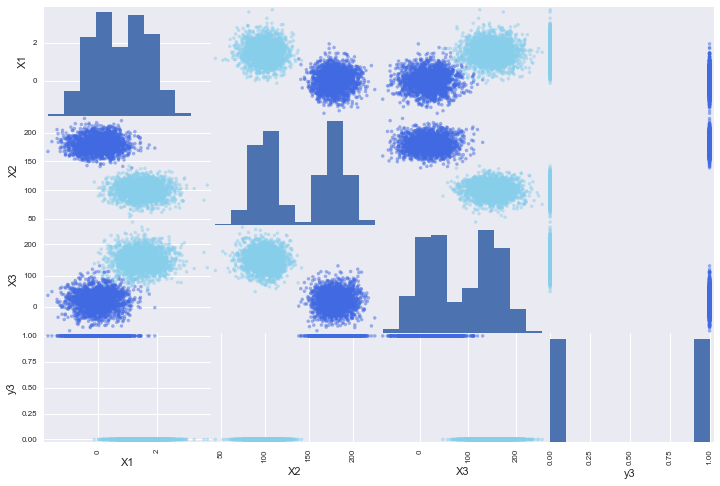

In [102]:
attributes = df_final.columns
y_class = df_final["y3"]
colors_palette={0.0:'skyblue',1.0:'royalblue'} 
colors = [colors_palette[c] for c in y_class]
scatter_matrix(df_final[attributes], figsize=(12, 8), c=colors)

In [103]:
df_final.corr()

,X1,X2,X3,y3
X1,1.000000,-0.789449,0.751678,-0.829683
X2,-0.789449,1.000000,-0.864705,0.951244
X3,0.751678,-0.864705,1.000000,-0.906143
y3,-0.829683,0.951244,-0.906143,1.000000


### 2. Split hold-out dataset

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
df_X = df_final.loc[:,['X1','X2','X3']]
df_X.head()

,X1,X2,X3
0,-0.012729,191.822864,15.844088
1,-0.562967,214.645906,9.767416
2,-0.017746,178.307363,2.814226
3,0.164986,195.773796,13.274704
4,0.100033,206.662876,24.377892


In [106]:
df_y = df_final.loc[:,'y3']
df_y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y3, dtype: float64

##### 데이터에서 30% holdout 분리. 70% 데이터 안에서 다시 train, test 80%:20%로 나눔

In [108]:
X_hold, X_holdout, y_hold, y_holdout = train_test_split(df_X, df_y, test_size = 0.3, random_state =42)
X_train, X_test, y_train, y_test = train_test_split(X_hold, y_hold, test_size = 0.2, random_state =42)

### 3-1. 로지스틱 회귀분석

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,confusion_matrix, classification_report

In [109]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train,y_train)
log_reg.coef_

array([[-1.92040462,  0.10465966, -0.15061081]])

In [110]:
y_pred = log_reg.predict(X_test)

In [111]:
print('Accuracy: ' + str(accuracy_score(y_test, log_reg.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, log_reg.predict(X_test))))

Accuracy: 1.0
Test Error: 0.0


In [112]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[273   0]
 [  0 287]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       273
        1.0       1.00      1.00      1.00       287

avg / total       1.00      1.00      1.00       560



In [113]:
# labeled confusion matrix for predicted values
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,273,0
1,0,287


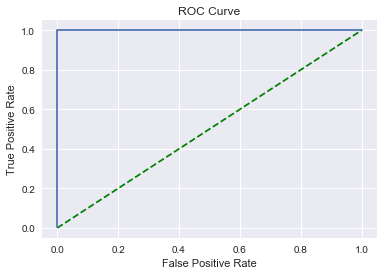

In [114]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### statsmodels로 로지스틱 회귀분석 하기 
- sklearn에서 coefficient 의 variance를 확인하는 방법을 찾지 못해서, statsmodels를 사용했습니다. 
- 아래 결과를 보시면, 확실히 잘 나뉜 데이터넷에서 로지스틱 회귀분석을 했을 때, coefficient의 variance가 매우 큰 것을 확인할 수 있었습니다. 

In [83]:
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score

In [115]:
log_reg_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()
log_reg_sm.summary2()

         Current function value: 0.000000
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   35.0000    
Dependent Variable: y3               Pseudo R-squared: 1.000      
Date:               2018-05-30 02:44 AIC:              8.0000     
No. Observations:   2240             BIC:              30.8569    
Df Model:           3                Log-Likelihood:   -3.0676e-07
Df Residuals:       2236             LL-Null:          -1551.9    
Converged:          0.0000           Scale:            1.0000     
------------------------------------------------------------------
        Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------
const  -16.3580 79116.9618 -0.0002 0.9998 -155082.7537 155050.0377
X1     -30.0956 31266.9744 -0.0010 0.9992  -61312.2394  61252.0482
X2       0.7864   174.0951  0.0045 0.9964    -340.4338    342.0065
X3      -0.8439   892.6741 -0.0009 0.9992   -1750.4530   1748.7652
==================================================================

"""

In [116]:
log_reg_sm.predict()

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.50091187e-74, 1.00000000e+00, 1.00000000e+00])

In [117]:
log_reg_sm.pred_table()

array([[1149.,    0.],
       [   0., 1091.]])

### 5 corss validation

In [119]:
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score

In [120]:
result_log_reg_accuracy = cross_val_score(log_reg, X_hold, y_hold, cv=5, scoring = 'accuracy') 
print(result_log_reg_accuracy)
print(result_log_reg_accuracy.mean())
print(result_log_reg_accuracy.var())

[1.         1.         1.         0.99821109 1.        ]
0.9996422182468695
5.120311314928014e-07


In [121]:
predicted = cross_validation.cross_val_predict(log_reg, X_hold, y_hold, cv=5)

In [122]:
print(metrics.classification_report(y_hold, predicted))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1422
        1.0       1.00      1.00      1.00      1378

avg / total       1.00      1.00      1.00      2800



### 3-2. LDA

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [124]:
lda_fit.priors_ # group priors

array([0.51294643, 0.48705357])

In [125]:
lda_fit.means_ # group means

array([[ 1.49696305e+00,  9.95578859e+01,  1.51013084e+02],
       [-1.44523819e-02,  1.80159469e+02,  2.09666160e+01]])

In [126]:
lda_fit.scalings_ # coefficients of ld

array([[-0.72880009],
       [ 0.05867578],
       [-0.01700879]])

In [127]:
conf_m = pd.DataFrame(confusion_matrix(y_test, lda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,273,0
1,0,287


In [128]:
print('Accuracy: ' + str(accuracy_score(y_test, lda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, lda_fit.predict(X_test))))

Accuracy: 1.0
Test Error: 0.0


In [129]:
result_LDA_accuracy = cross_val_score(lda_model, X_hold, y_hold, cv=5, scoring = 'accuracy') 
print(result_LDA_accuracy)
print(result_LDA_accuracy.mean())
print(result_LDA_accuracy.var())

predicted_LDA = cross_validation.cross_val_predict(lda_model, X_hold, y_hold, cv=5)
print(metrics.classification_report(y_hold, predicted_LDA))

[1. 1. 1. 1. 1.]
1.0
0.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1422
        1.0       1.00      1.00      1.00      1378

avg / total       1.00      1.00      1.00      2800



### 3-3. QDA

In [130]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

In [131]:
qda_fit.priors_ # group priors

array([0.51294643, 0.48705357])

In [132]:
qda_fit.means_ # group means

array([[ 1.49696305e+00,  9.95578859e+01,  1.51013084e+02],
       [-1.44523819e-02,  1.80159469e+02,  2.09666160e+01]])

In [133]:
qda_fit.scalings_ # coefficients of ld

[array([9.43551345e+02, 1.70549461e+02, 2.56737435e-01]),
 array([9.14348756e+02, 1.66951265e+02, 2.50770104e-01])]

In [134]:
conf_m = pd.DataFrame(confusion_matrix(y_test, qda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,273,0
1,0,287


In [135]:
print('Accuracy: ' + str(accuracy_score(y_test, qda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, qda_fit.predict(X_test))))

Accuracy: 1.0
Test Error: 0.0


In [136]:
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
result_QDA_accuracy = cross_val_score(qda_model, X_hold, y_hold, cv=5, scoring = 'accuracy') 
print(result_QDA_accuracy)
print(result_QDA_accuracy.mean())
print(result_QDA_accuracy.var())

predicted_QDA = cross_validation.cross_val_predict(qda_model, X_hold, y_hold, cv=5)
print(metrics.classification_report(y_hold, predicted_QDA))

[1. 1. 1. 1. 1.]
1.0
0.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1422
        1.0       1.00      1.00      1.00      1378

avg / total       1.00      1.00      1.00      2800

